# Introduction

In this project, I will be exploring a combined dataset of used cars in the United Kingdom. I will be using nine datasets from Kaggle user [adityadesai13's 100,000 UK Cars dataset](https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?select=audi.csv).

According to the metadata, the data is sourced from [Exchange and Mart](https://www.exchangeandmart.co.uk/), a marketplace based in the United Kingdom selling cars, bikes, vans, and other items for sale. The data was webscraped by the author and sorted out into each dataset per manufacturer. 

The datasets are as followed:
+ audi.csv
+ bmw.csv
+ ford.csv
+ hyundi.csv
+ merc.csv
+ skoda.csv
+ toyota.csv
+ vauxhall.csv
+ vw.csv

# Data Dictionary

Each individual dataset mentioned has the following columns:

+ Manufacturer
  + The manufacturer of the car.
+ Model
  + The type of car that was produced.
+ Year
  + The model year of the car that was released.
+ Price
  + The price of the car, in British Pounds (£).
+ Transmission
  + The type of transmission that the car has.
+ Mileage
  + How much mileage, in miles, that the car has driven.
+ Fuel Type
  + The type of fuel that the car is powered by.
+ Tax
  + The annual tax for the car, in British Pounds (£).
+ Miles Per Gallon
  + How much fuel economy that a car has, measured in miles per gallon.
+ Engine Size
  + Total volume of air that is pushed by a car's cylinders, measured in liters.

# Loading datasets

I renamed some of the datasets for data cleaning purposes to make it more clear which manufacturer produced what car, as the original datasets weren't clear and concise to a limited extent.

I first began by combining all of the files into one single DataFrame to make an extensive analysis of used cars.

In [28]:
import os
import pandas as pd
import seaborn as sns
import numpy as np

folder_name = 'data/raw'
used_cars_uk = pd.DataFrame({})

folder = os.fsencode(folder_name)

# Since there are 9 separate CSV files all with the exact same columns inside the data directory, 
# I am going to loop through the files in the data directory with a for loop and read the files as a DataFrame
# to then combine into one singular DataFrame where I will access all of the data for the project.

for xls_file in os.listdir(folder_name):
    file = os.fsdecode(xls_file)

    first_split = file.split('.')[0].capitalize()
    df = pd.read_csv(f'{folder_name}/{file}')
    df['manufacturer'] = first_split
    used_cars_uk = pd.concat(objs=[used_cars_uk, df])

used_cars_uk

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,Volkswagen
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,Volkswagen
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,Volkswagen
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,Volkswagen


# Data Cleaning

I began my data cleaning process by checking for null values.

In [29]:
used_cars_uk.count() # Count non-null values in each column

model           99187
year            99187
price           99187
transmission    99187
mileage         99187
fuelType        99187
tax             99187
mpg             99187
engineSize      99187
manufacturer    99187
dtype: int64

There isn't any null values in this combined dataset. Let's check out the maximum and minimum values in each column. 

In [30]:
used_cars_uk.max()

model                  230
year                  2060
price               159999
transmission     Semi-Auto
mileage             323000
fuelType            Petrol
tax                    580
mpg                  470.8
engineSize             6.6
manufacturer    Volkswagen
dtype: object

In [31]:
used_cars_uk.min()

model            1 Series
year                 1970
price                 450
transmission    Automatic
mileage                 1
fuelType           Diesel
tax                     0
mpg                   0.3
engineSize            0.0
manufacturer         Audi
dtype: object

Let's start a little bit of investigating. Let's begin by plotting the model years for each car in the dataset.

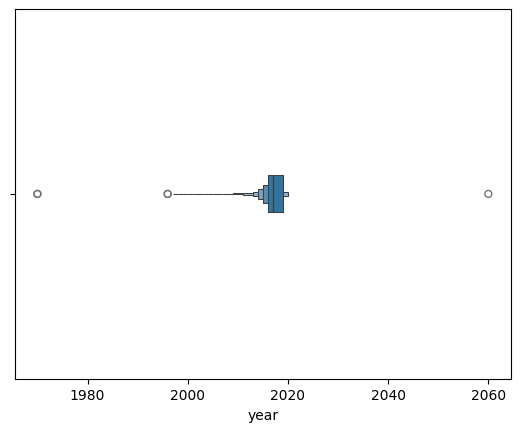

In [32]:
sns.boxenplot(
    data=used_cars_uk, 
    x='year', 
    width=0.1
);

Figure 1: An enhanced boxplot showing the distribution of used cars sorted by their production year, before they were cleaned. 

Based on Figure 1, there are two points of interest:

One point has a car released in the year 2060. Either someone imported this car via time travel or it's a data entry error.

Another point has a car released in the 1970s. This could be a data entry error but it is possible that the car is real. 

Let's further investigate these two points.

In [33]:
oldest_car = used_cars_uk[(used_cars_uk['year'] == used_cars_uk['year'].sort_values().iloc[0])]
oldest_car

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer
12072,M Class,1970,24999,Automatic,14000,Diesel,305,39.2,0.0,Mercedes
10837,Zafira,1970,10495,Manual,37357,Petrol,200,42.2,1.4,Vauxhall


In [34]:
newest_car = used_cars_uk[(used_cars_uk['year'] == used_cars_uk['year'].sort_values(ascending=False).iloc[0])]
newest_car

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer
17726,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4,Ford


After further research, there is no such thing as a 1970 Mercedes M Class, a 1970 Vauxhall Zafira, or a 2060 Ford Fiesta.
Let's drop them from the DataFrame.

In [35]:
oldest_and_newest = pd.concat(objs=[oldest_car, newest_car]).index
used_cars_uk = used_cars_uk.drop(index=oldest_and_newest)

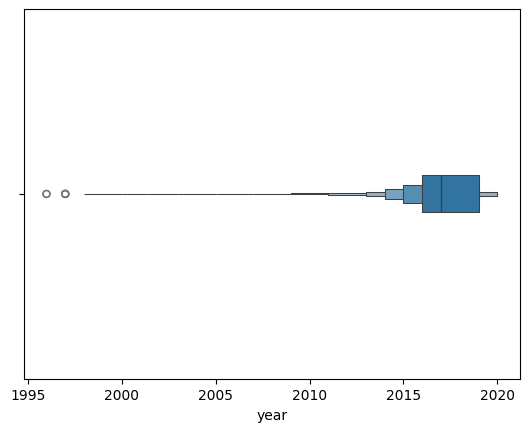

In [36]:
sns.boxenplot(
    data=used_cars_uk, 
    x='year', 
    width=0.1
);

Figure 1.1: An enhanced boxplot showing the distribution of used cars sorted by their production year, after it was cleaned.

There we go. Figure 1.1 shows the distribution of used cars after the two points were cleaned.

However, the fake M-Class car had a engine size of 0 liters. Let's investigate this further.

In [37]:
used_cars_uk['engineSize'].sort_values().unique()

array([0. , 0.6, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ,
       2.1, 2.2, 2.3, 2.4, 2.5, 2.7, 2.8, 2.9, 3. , 3.2, 3.5, 3.7, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.7, 5. , 5.2, 5.4, 5.5, 6. , 6.2, 6.3,
       6.6])

In [38]:
zero_liters = used_cars_uk[(used_cars_uk['engineSize'] == 0)].sort_values(by='engineSize', ascending=False)
zero_liters

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer
7505,Q5,2019,44790,Automatic,5886,Petrol,135,117.7,0.0,Audi
64,I10,2018,8300,Manual,13148,Petrol,150,60.1,0.0,Hyundai
77,I20,2017,8500,Manual,16708,Petrol,145,58.9,0.0,Hyundai
76,Tucson,2017,15700,Automatic,7457,Diesel,125,57.6,0.0,Hyundai
75,I10,2015,7500,Manual,13637,Petrol,30,57.6,0.0,Hyundai
...,...,...,...,...,...,...,...,...,...,...
8708,3 Series,2018,18000,Automatic,24716,Diesel,150,64.2,0.0,Bmw
8710,1 Series,2016,12400,Manual,24528,Diesel,20,68.9,0.0,Bmw
8735,2 Series,2016,15000,Automatic,17097,Diesel,20,68.9,0.0,Bmw
8934,2 Series,2015,14700,Automatic,32882,Diesel,125,60.1,0.0,Bmw


This is likely a data entry error. Let's drop the rows where there are 0 liter engines.

In [39]:
used_cars_uk = used_cars_uk.drop(index=zero_liters.index)

In [40]:
used_cars_uk

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,Volkswagen
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,Volkswagen
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,Volkswagen
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,Volkswagen


Then, I investigated the fuel economy (in miles per gallon) for each car and found a significant number of outliers. As a result, I used the 1.5 IQR method to remove the outliers in the fuel economy data.

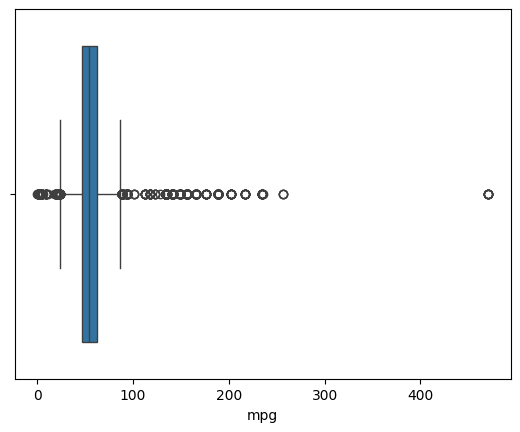

In [41]:
sns.boxplot(data=used_cars_uk, x='mpg');

In [42]:
q1 = np.percentile(used_cars_uk['mpg'], 25)
q3 = np.percentile(used_cars_uk['mpg'], 75)
iqr = (q3 - q1)

low = (q1 - (1.5 * iqr))
high = (q3 + (1.5 * iqr))

outliers = pd.concat(
    objs=[
        used_cars_uk[used_cars_uk['mpg'] < low],
        used_cars_uk[used_cars_uk['mpg'] > high]
    ]
)

used_cars_uk = used_cars_uk.drop(index=outliers.index)

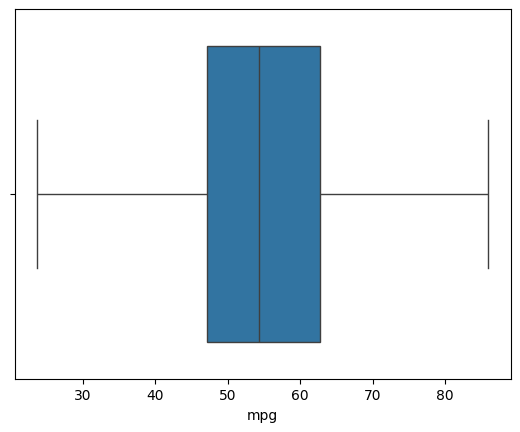

In [43]:
sns.boxplot(data=used_cars_uk, x='mpg');

In [44]:
used_cars_uk

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,Volkswagen
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,Volkswagen
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,Volkswagen
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,Volkswagen


# Graphs

In this section, I will be showcasing various graphs showing data from the used cars dataset. I will discuss their findings as well.

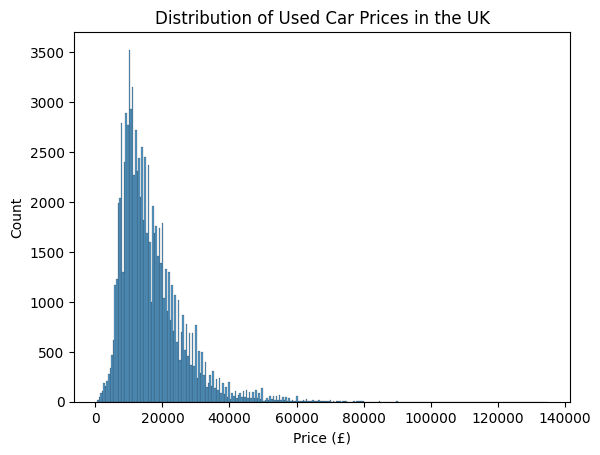

In [45]:
plt = sns.histplot(
    data=used_cars_uk, 
    x='price'
);

plt.set_title('Distribution of Used Car Prices in the UK')
plt.set_xlabel('Price (£)');

Figure 2: A histogram of used car prices in the United Kingdom, in Great British Pounds (£).

Figure 2 shows that the distribution of used car prices is skewed to the right, centered at around £15,000.

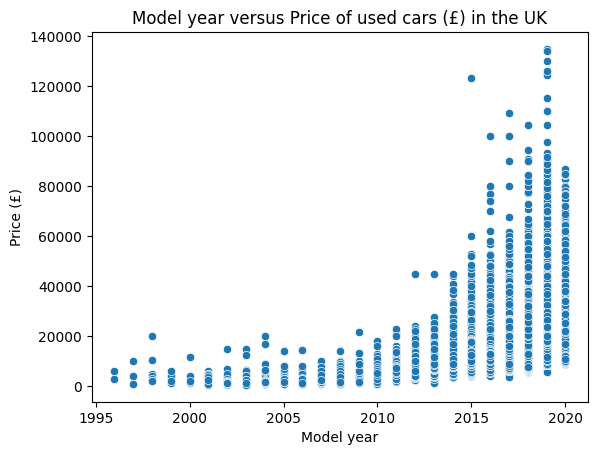

In [46]:
plt = sns.scatterplot(
    data=used_cars_uk, 
    x='year', 
    y='price'
);

plt.set_title('Model year versus Price of used cars (£) in the UK');
plt.set_xlabel('Model year');
plt.set_ylabel('Price (£)');

Figure 3: A scatterplot showing the model year and the mileage reported for each car.

Figure 3 has an exponential relationship between the model year and the price of a car, with more recently released cars being more expensive than older cars. This is reflective of the fact that as cars are a depreciating asset - as the car gets older, the value of that car declines. Additionally, Figure 4 showcases a similar relationship as cars that have more mileage lose more of their value. 

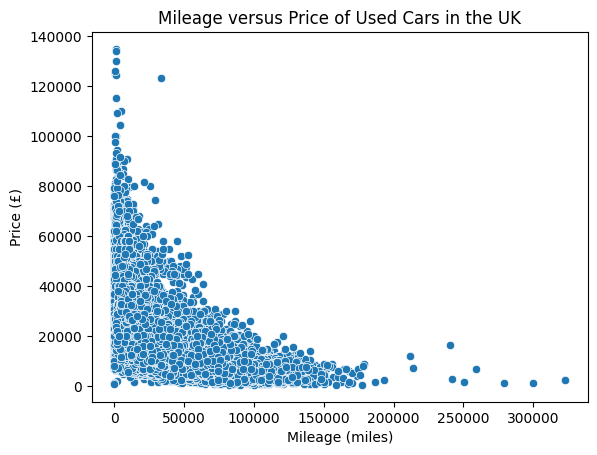

In [47]:
plt = sns.scatterplot(data=used_cars_uk, x='mileage', y='price');
plt.set_title('Mileage versus Price of Used Cars in the UK');
plt.set_xlabel('Mileage (miles)');
plt.set_ylabel('Price (£)');

Figure 4: A scatterplot showing the mileage and the price reported for each car.

Based on Figures 3 and 4, it's clear that model year and mileage are significant and obvious factors that determine the price of a used car. But this is basic analysis. I will show more graphs to try to find other factors that determine the price of a used car. Figures 5 thru 8 below will present other factors that may influence the price of a used car.

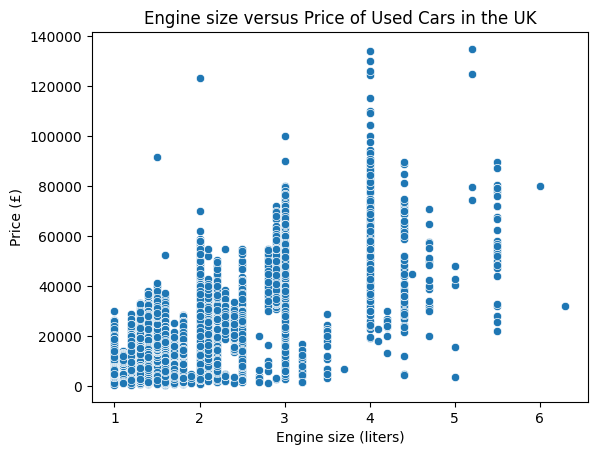

In [48]:
plt = sns.scatterplot(data=used_cars_uk, x='engineSize', y='price');
plt.set_title('Engine size versus Price of Used Cars in the UK');
plt.set_xlabel('Engine size (liters)');
plt.set_ylabel('Price (£)');

Figure 5: A scatterplot showing the engine size in liters and the price reported for each car.

In [49]:
corrmatrix = np.corrcoef(x=used_cars_uk['engineSize'].to_numpy(), y=used_cars_uk['price'].to_numpy())
r = corrmatrix[0, 1]
r_2 = r**2

print(f"R: {r}")
print(f"R-squared: {r_2}")

R: 0.6495250073744939
R-squared: 0.4218827352048364


Based on Figure 5 and the R and R-squared values, there is a somewhat strong linear relationship between engine size and the price of a car and around 42% of the variance in the price of a used car can be explained by the engine size of a used car. However, the relationship between engine size and the price of a car should be investigated further in more research.

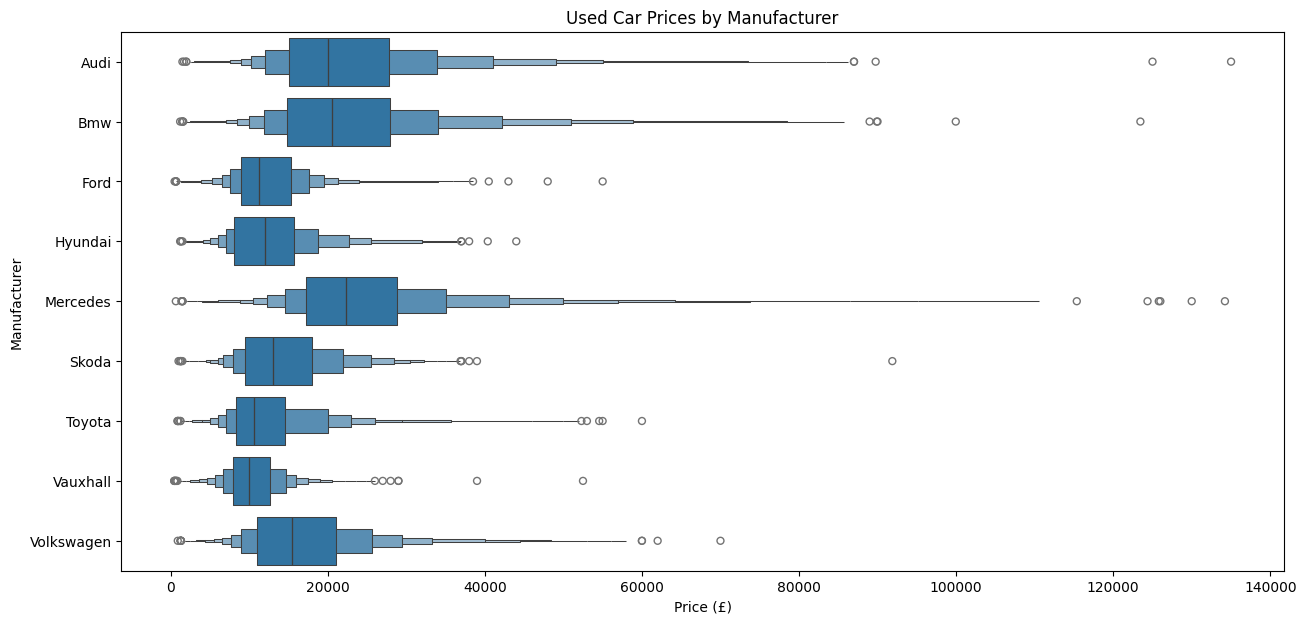

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 7))
graph = sns.boxenplot(data=used_cars_uk, y='manufacturer', x='price', native_scale=False);
graph.set_title('Used Car Prices by Manufacturer');
graph.set_ylabel('Manufacturer');
graph.set_xlabel('Price (£)');

fig.axes[0] = graph

Figure 6: An enhanced boxplot showing the distribution of the price of used cars by manufacturer.

Figure 6 shows an enhanced boxplot of the distribution of used cars sorted by manufacturer. It can be inferred from Figure 6 that some manufacturers (such as Mercedes-Benz) have more expensive used cars compared to other manufacturers (such as Vauxhall), based on the distributions of each manufacturer in Figure 6. This is another obvious factor in determining the price of used cars.

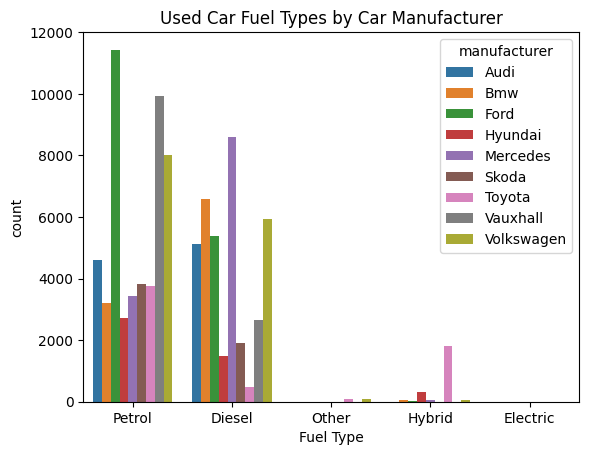

In [51]:
plt = sns.countplot(data=used_cars_uk, x='fuelType', hue='manufacturer');
plt.set_title('Used Car Fuel Types by Car Manufacturer');
plt.set_xlabel('Fuel Type');

Figure 7: A count of cars by fuel type, sorted into car manufacturers.

Figure 7 is a count plot showing how many used cars on the market are powered by, further sorted out by car manufacturers. From Figure 7 it is clear that some manufacturers have used cars powered by a certain fuel type than other manufacturers; for example, Toyota is the largest manufacturer in hybrid used cars from the dataset.

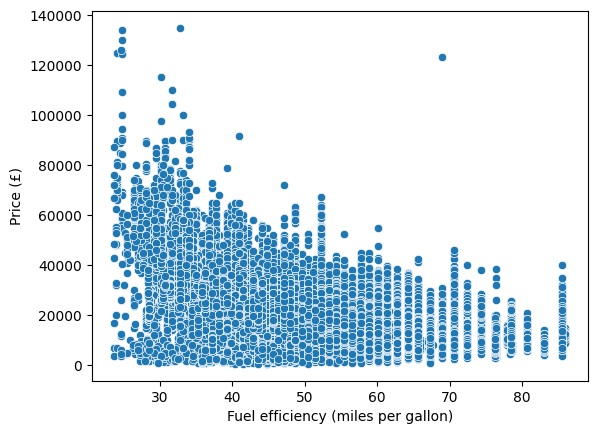

In [52]:
plt = sns.scatterplot(data=used_cars_uk, x='mpg', y='price');
plt.set_xlabel('Fuel efficiency (miles per gallon)');
plt.set_ylabel('Price (£)');

Figure 8: A scatterplot showing the miles per gallon and price of each used car.

After accounting for outliers using the 1.5 * IQR method, Figure 7 seemingly shows a negative relationship between the fuel economy and the price of a used car. This is an area that needs further research as it's unclear why (subsidies for more fuel efficient cars?). Additionally, I thought that more fuel efficient cars should be more expensive.

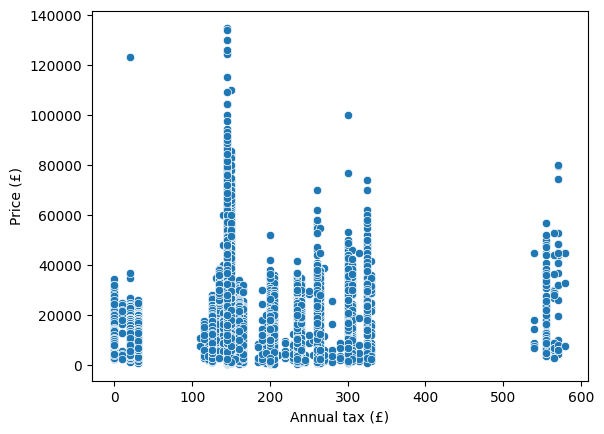

In [57]:
plt = sns.scatterplot(data=used_cars_uk, x='tax', y='price');
plt.set_xlabel('Annual tax (£)');
plt.set_ylabel('Price (£)');

Figure 9: A scatter plot showing the tax and price for each used car.

Figure 9 shows that there is no linear relationship between the annual tax of a used car and the price of a used car. This is worth further investigation to control for factors that may affect how the annual tax of a used car is calculated.

# Conclusion

From this exploratory data analysis, there are many obvious factors that affect the price of a used car, such as mileage  the age of a used car, and the manufacturer of the used car. However, there are other factors that are worth further investigation, such as the engine size of a used car and the fuel economy of a used car. Investigating these factors can provide more insight into the used car market not just in the United Kingdom, but in other markets as well.

In [54]:
# Save combined dataset as CSV file
used_cars_uk.to_csv(f'data/used_cars_uk.csv', index=False)